# Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn integrates closely with pandas data structures.
[https://seaborn.pydata.org/](https://seaborn.pydata.org/)

In [ ]:
# install the seaborn package
!pip install seaborn

In [ ]:
# upgrade the seaborn package to the newest version
!pip install seaborn --upgrade

In [3]:
import seaborn as sns  # naming convention: 'sns'
sns.set_theme()  # set the default theme

Seaborn allows you to work directly with Pandas DataFrames specifying what variables you want to visuzalize and in which type of plot:

In [4]:
import pandas as pd

# load a Pandas DataFrame
df = pd.read_csv('dataset.csv', na_values = '9999')

In [5]:
df['depression_bin'] = df['depression'] >= 10  # create a new boolean column in the DataFrame
sampled_df = df.sample(500)  # sample 500 observations for illustration purposes
sampled_df.head()

,depression,gender,has_father,has_grandmother,has_mother,in_university,language,math_performance,nationality,city,read_performance,scie_performance,ses,depression_bin
146,3.0,1,True,False,True,1.0,True,511.92554,25.0,3,509.47446,498.35882,-0.11,False
2067,NaN,1,True,True,True,NaN,False,455.84204,25.0,5,474.76310,500.13054,0.01,False
2302,6.0,1,False,True,True,1.0,True,383.47874,25.0,7,424.08610,433.73740,0.51,False
1094,NaN,2,True,False,True,NaN,True,463.94300,25.0,4,442.49506,440.45132,1.06,False
1825,2.0,2,False,False,True,1.0,True,424.45086,25.0,3,433.11226,395.50540,-0.18,False


Now all we have to do is call a single seaborn function to produce a plot. The plotting options are configured with arguments passed to this function. Sometimes code readability is improved if we write these arguments on multiple lines (Python has no issues with that).

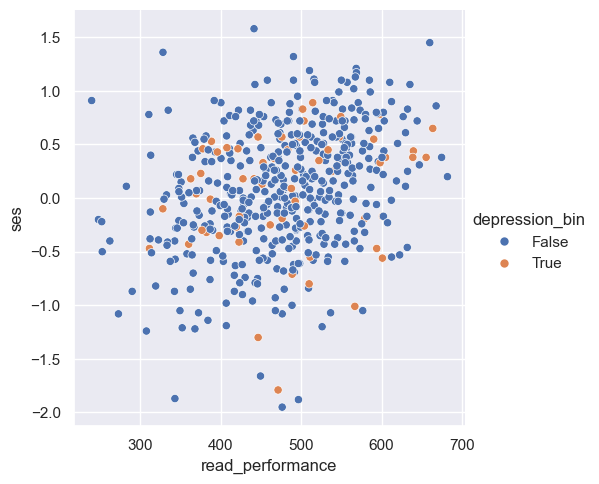

In [6]:
sns.relplot(data = sampled_df,  # where to get data from
            x = "read_performance",  # which column to use for the x-axis
            y = 'ses',  # which column to use for the y-axis
            hue = "depression_bin")   # which column to use for hue

## Types of Plots

![seaborn](https://seaborn.pydata.org/_images/function_overview_8_0.png)

Image credit: https://seaborn.pydata.org/tutorial/function_overview.html

## Single Variables – Distributions

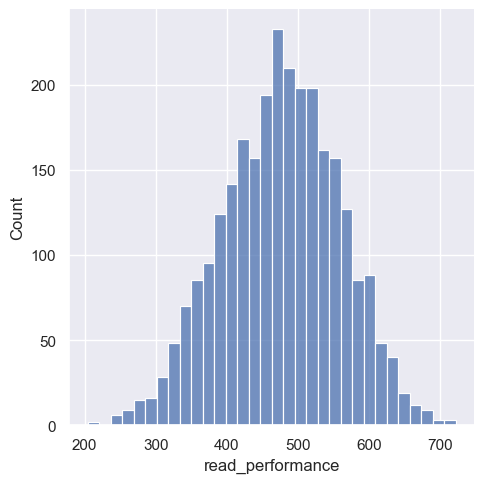

In [7]:
sns.displot(data = df, x = "read_performance")  # tell Seaborn to plot the distribution of 'read_performance' and let it figure out the rest

<Axes: xlabel='read_performance', ylabel='Count'>

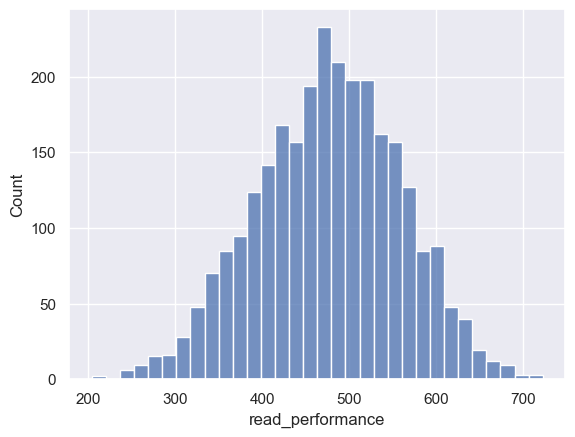

In [8]:
sns.histplot(data = df, x = "read_performance")  # we can also specify that we want a sns.histplot

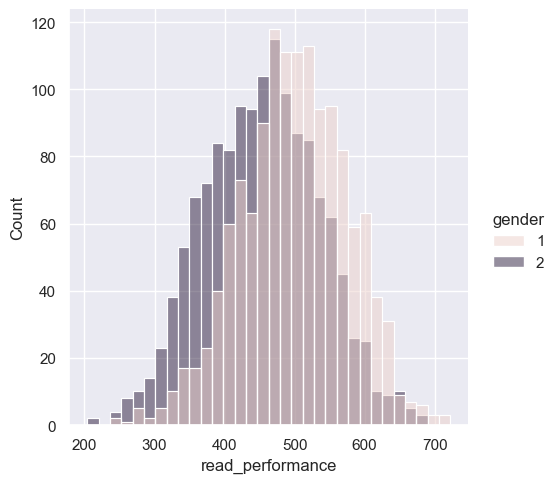

In [9]:
sns.displot(data = df, x = "read_performance", hue = 'gender')  # we can plot two distributions at the same time with different colors

This looks a bit pale because the data type of the `gender` column is set to integer automatically. We can fix this by specifying gender being categorical.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   depression        2254 non-null   float64
 1   gender            2751 non-null   int64  
 2   has_father        2751 non-null   bool   
 3   has_grandmother   2751 non-null   bool   
 4   has_mother        2751 non-null   bool   
 5   in_university     2173 non-null   float64
 6   language          2751 non-null   bool   
 7   math_performance  2751 non-null   float64
 8   nationality       2715 non-null   float64
 9   city              2751 non-null   int64  
 10  read_performance  2751 non-null   float64
 11  scie_performance  2751 non-null   float64
 12  ses               2738 non-null   float64
 13  depression_bin    2751 non-null   bool   
dtypes: bool(5), float64(7), int64(2)
memory usage: 207.0 KB


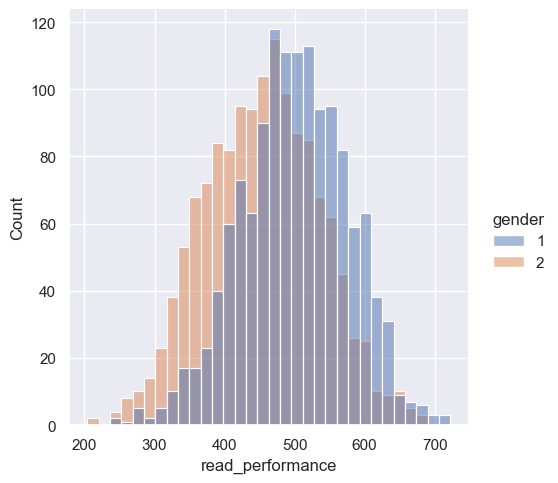

In [11]:
df["gender"] = df["gender"].astype("category")
sns.displot(data = df, x = "read_performance", hue = 'gender')

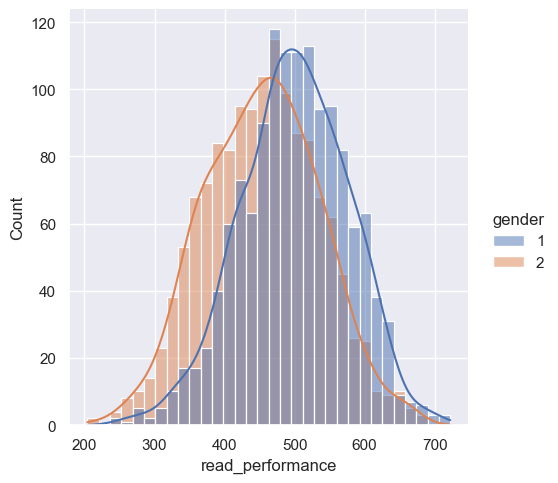

In [12]:
sns.displot(data = df, x = "read_performance", hue = 'gender', kde = True)  # add a line with kernel density estimation (kde)

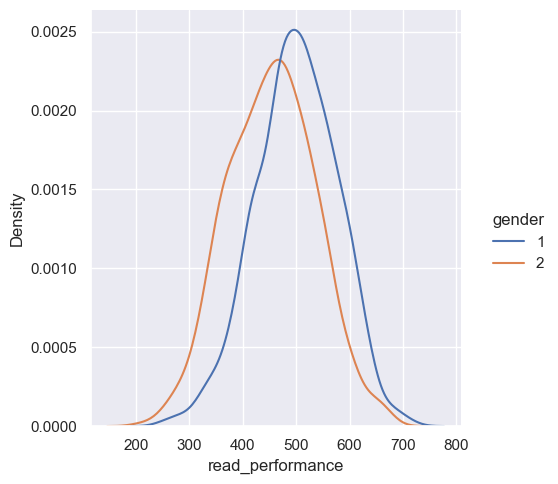

In [13]:
sns.displot(data = df, x = "read_performance", hue = 'gender', kind = 'kde')  # change the kind of sns.displot from histogram to 'kde'

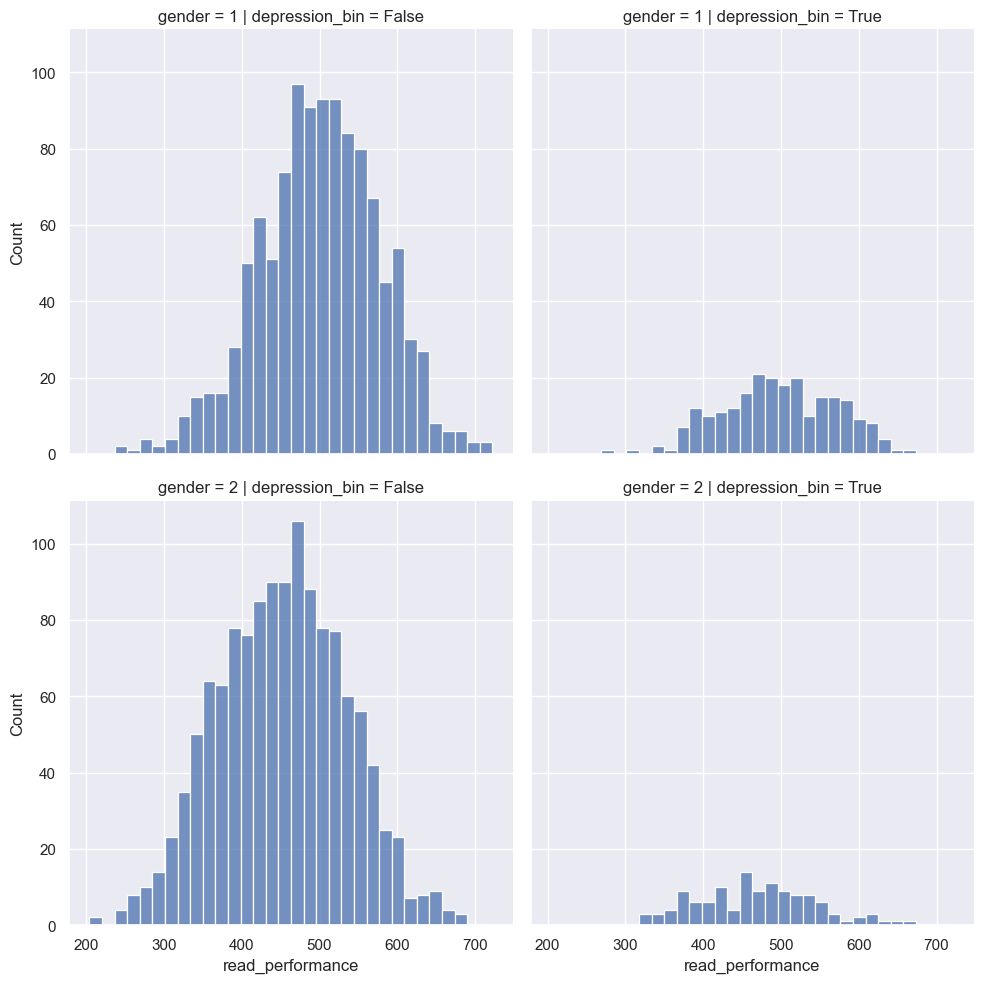

In [14]:
sns.displot(data = df, x = "read_performance", row = 'gender', col = 'depression_bin', kind = 'hist')  # create a grid of histograms using categorical variables in row & column

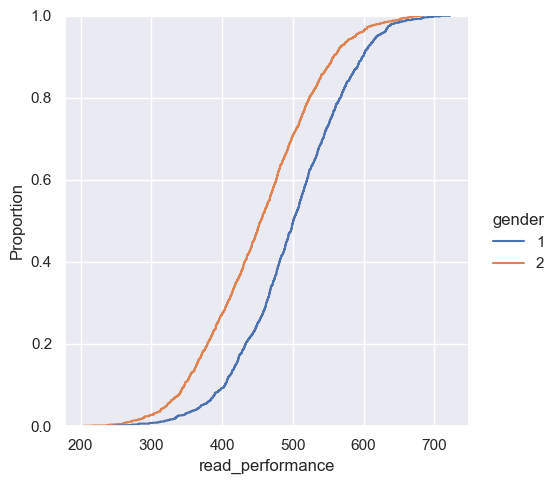

In [15]:
sns.displot(data = df, x = "read_performance", hue = 'gender', kind = 'ecdf')  # plot empirical cumulative distribution functions (ecdf)

## Two Variables – Categorical

Categorical plots show the relationship between two variables, one of which having categories and the other one being continuous.
If more than one observation is available in each category, bar plots by default show the mean and errorbars for the 95 % confidence interval (ci).

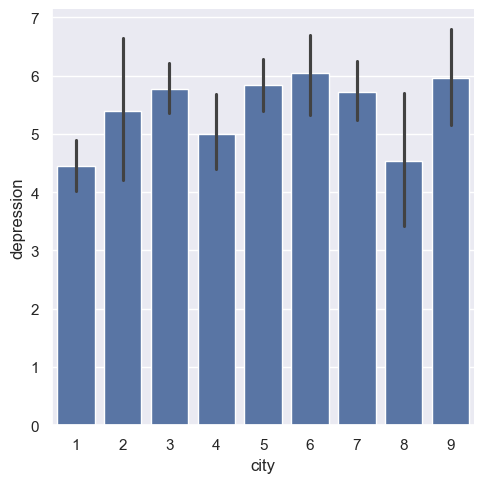

In [16]:
sns.catplot(data = df, y = "depression", x = 'city', kind = 'bar')  # sns.catplot defaults to a scatter plot, so we need to specify that we want bars

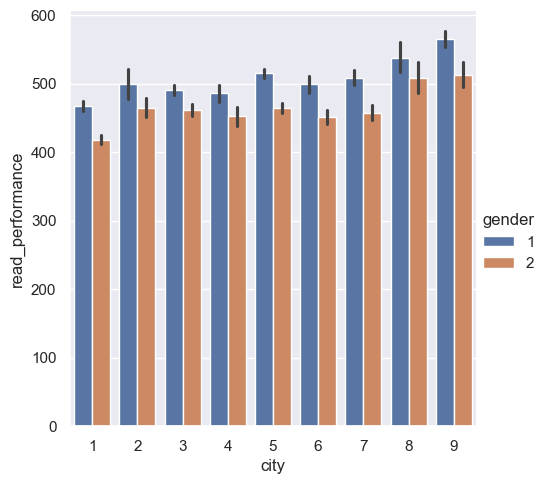

In [17]:
sns.catplot(data = df, y = "read_performance", x = 'city', kind = 'bar',
            hue = 'gender',  # adding different colored bars – notice how the two bars of each city are grouped together
            errorbar = ('ci', 90)  # adjust the type of errorbar to 90 % confidence interval (ci)
            )

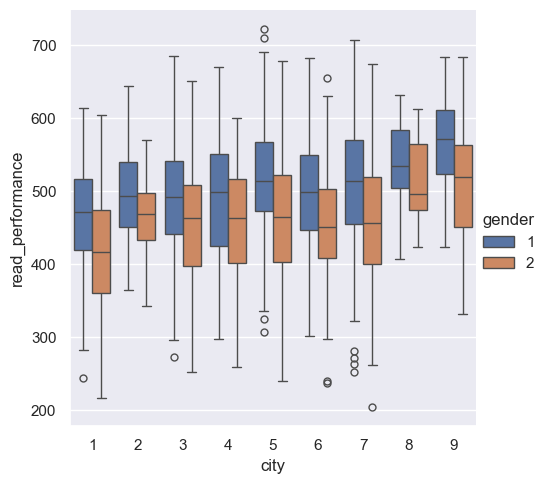

In [18]:
sns.catplot(data = df, y = "read_performance", x = 'city', hue = 'gender', kind = 'box')  # use boxplots instead – automatically handles outliers

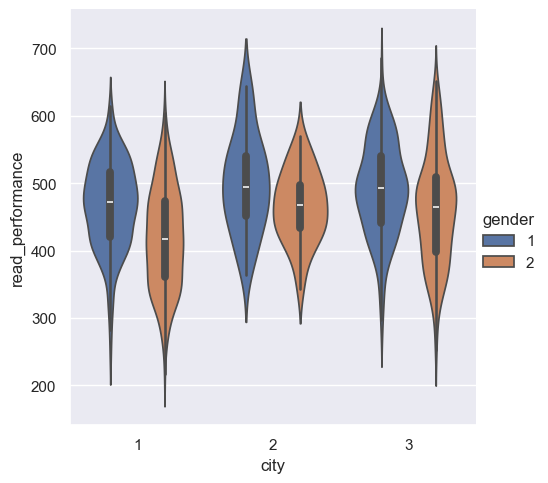

In [19]:
sns.catplot(data = df[df['city'] < 4], y = "read_performance", x = 'city', hue = 'gender', kind = 'violin')  # use violin plots for more detail

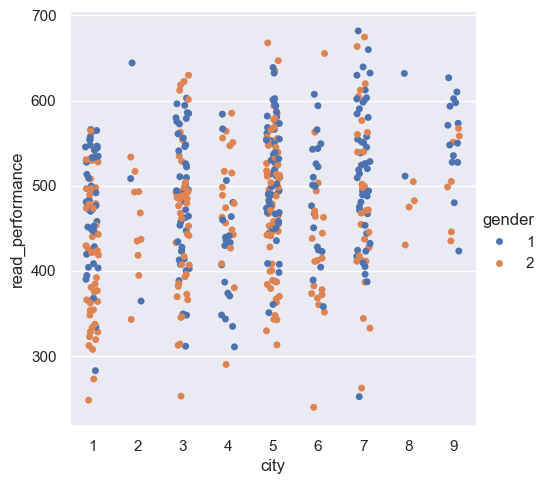

In [20]:
sampled_df['gender'] = sampled_df['gender'].astype('category')
sns.catplot(data = sampled_df, y = "read_performance", x = 'city', hue = 'gender', kind = 'strip', jitter=0.15)  # use scatterplots ('stripplot') for highest detail

We can also _bin_ a continuous variable first and then use a categorical plot. Binning involves splitting the values in specified intervals ('bins') and therefore simplifies a continuous variable.

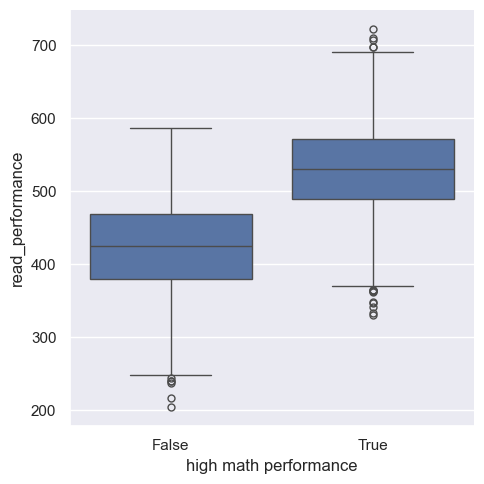

In [21]:
df['high math performance'] = df['math_performance'] >= df['math_performance'].mean()
sns.catplot(data = df, y = "read_performance", x = 'high math performance', kind = 'box')

## Two Continuous Variables – Relational

If both variables have continuous values, relational plots make more sense than categorical.

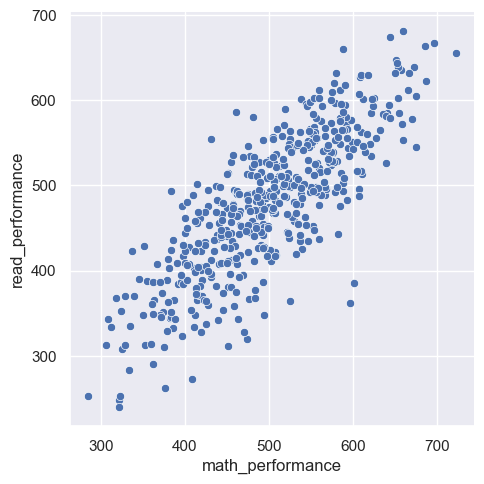

In [22]:
sns.relplot(data = sampled_df, x = "math_performance", y = "read_performance")  # tell Seaborn to plot the relation of 'read_performance' and 'math_performance'

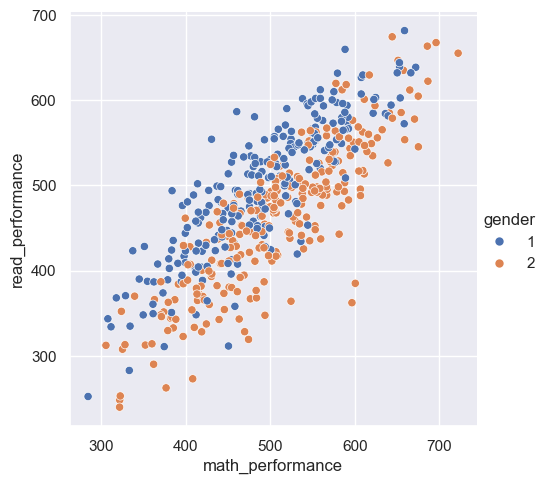

In [23]:
sns.relplot(data = sampled_df, x = 'math_performance', y = 'read_performance', hue = 'gender')  # add a categorical variable using hue

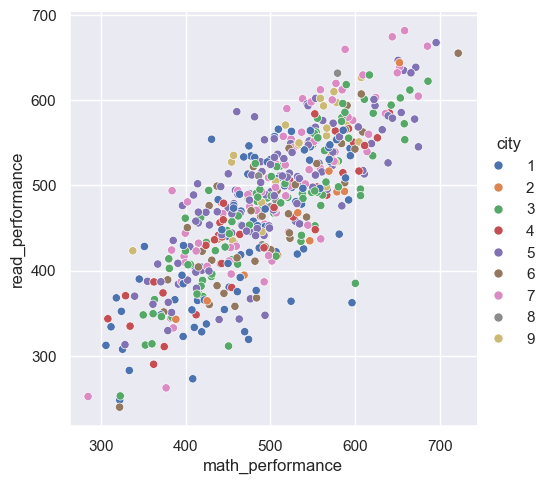

In [24]:
sampled_df['city'] = sampled_df['city'].astype('category')
sns.relplot(data = sampled_df, x = 'math_performance', y = 'read_performance', hue = 'city')  # more categories

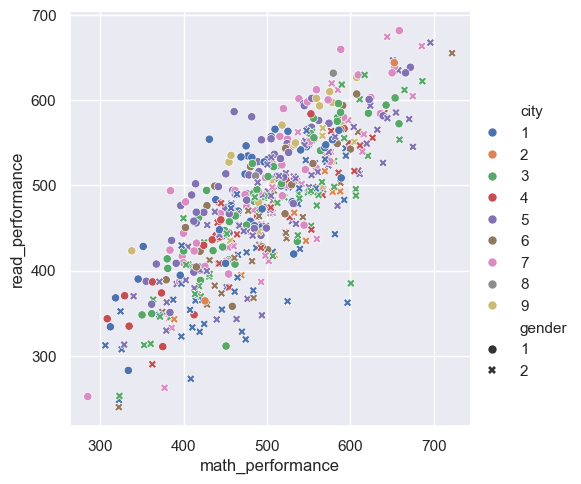

In [25]:
sns.relplot(data = sampled_df, x = 'math_performance', y = 'read_performance', hue = 'city', style = 'gender')  # also use different markers

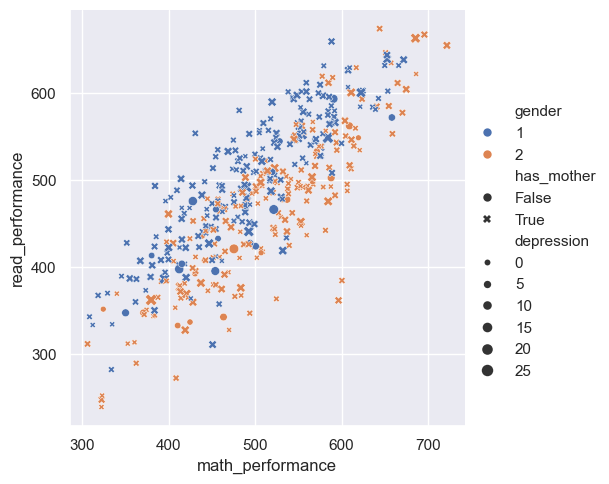

In [26]:
sns.relplot(data = sampled_df, x = 'math_performance', y = 'read_performance', hue = 'gender', size = 'depression', style = 'has_mother')  # also differentiate marker sizes

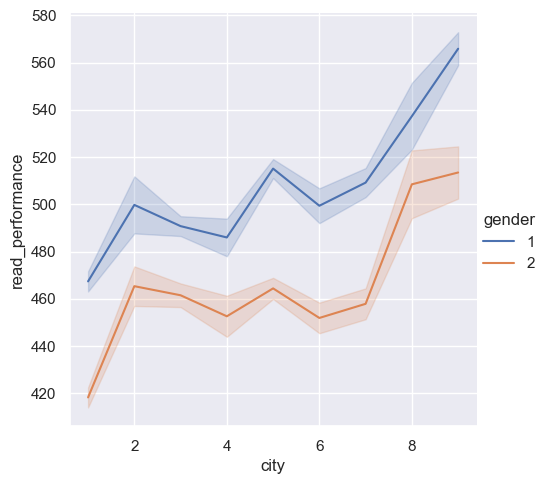

In [27]:
sns.relplot(data = df, x = 'city', y = 'read_performance', hue = 'gender', kind='line', errorbar = 'se')  # estimated lines (mean) + errorbands are another option

**Bonus:** seaborn can directly add regression lines on scatter/relational plots.

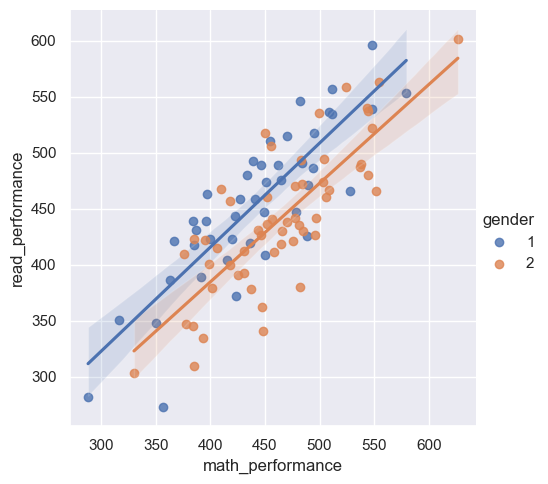

In [28]:
sns.lmplot(data = df.head(100), x = 'math_performance', y = 'read_performance', hue = 'gender')

## Two Continuous Variables – 2D Distributions

If we want to capture the relationship between two continuous variables and also show estimated density of data points, we can do so using `sns.displot` with `x` and `y` arguments.

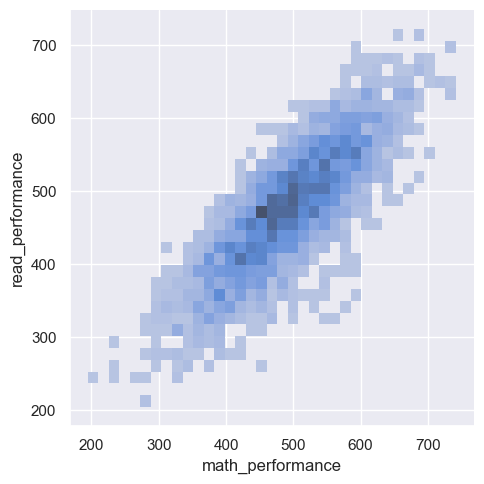

In [29]:
sns.displot(data = df, x = 'math_performance', y = 'read_performance')

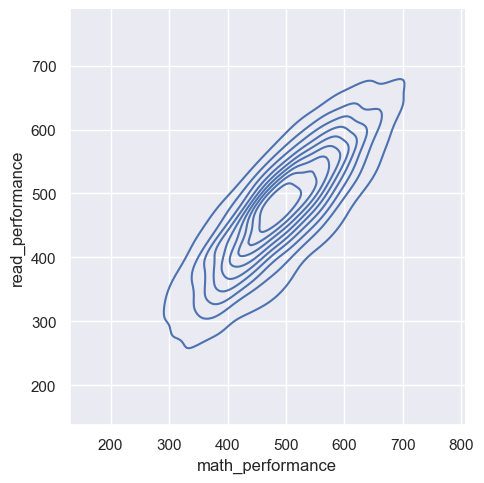

In [30]:
sns.displot(data = df, x = 'math_performance', y = 'read_performance', kind = 'kde')  # kernel density estimation (kde) is another option

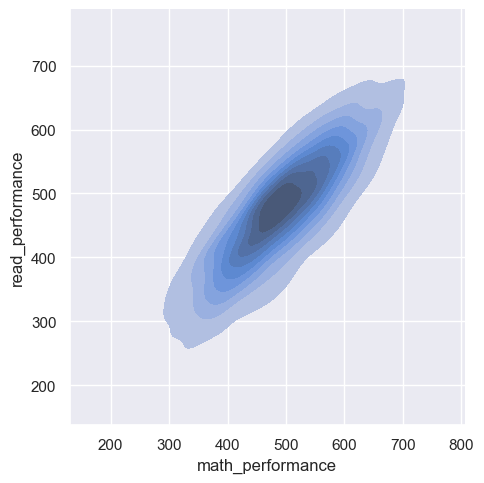

In [31]:
sns.displot(data = df, x = 'math_performance', y = 'read_performance', kind = 'kde', fill = True)  # one more way to plot kde

## Styling
Seaborn includes predefined _themes_, _palettes_, and _contexts_ to style your plots.

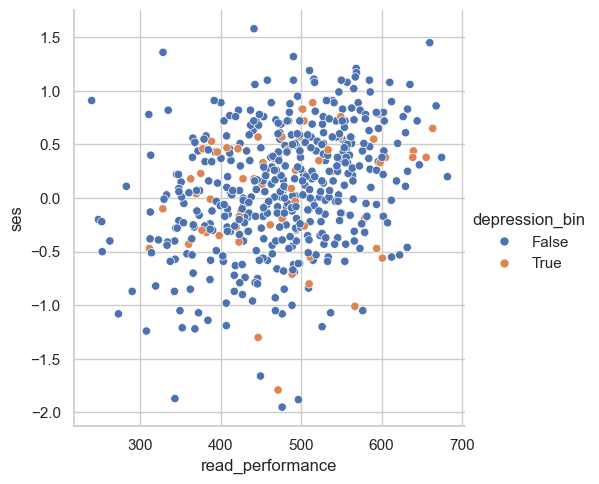

In [32]:
sns.set_theme(style='whitegrid')  # set a different color theme for the background
sns.relplot(data = sampled_df, x = "read_performance", y = 'ses', hue = "depression_bin")

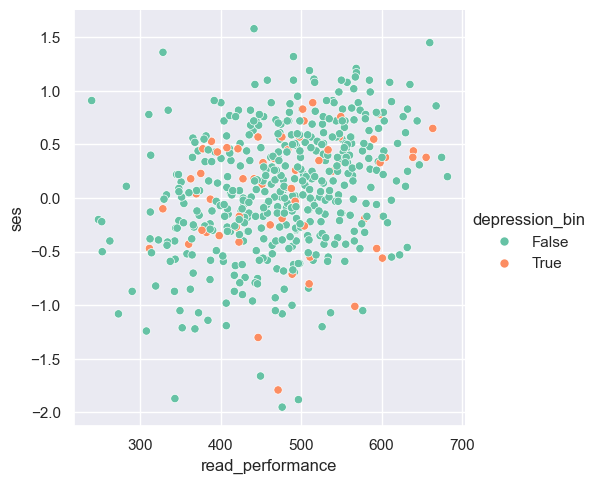

In [33]:
sns.set_theme()  # reset to defaults
sns.set_palette('Set2')  # adjust marker colors – the palette that the hues are chosen from
sns.relplot(data = sampled_df, x = "read_performance", y = 'ses', hue = "depression_bin")

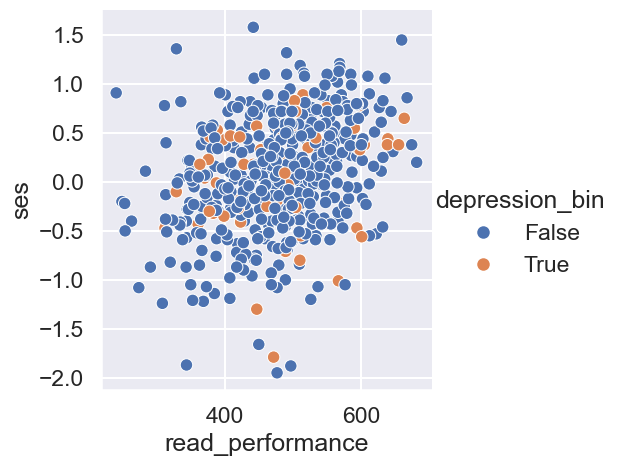

In [34]:
sns.set_theme()  # reset to defaults
sns.set_context('talk')  # adjust sizes
sns.relplot(data = sampled_df, x = "read_performance", y = 'ses', hue = "depression_bin")

Oftentimes the legend needs to be modified and/or moved to a different place in the figure. This can be achieved using `sns.move_legend(…)` (seaborn v0.11.2 or later).

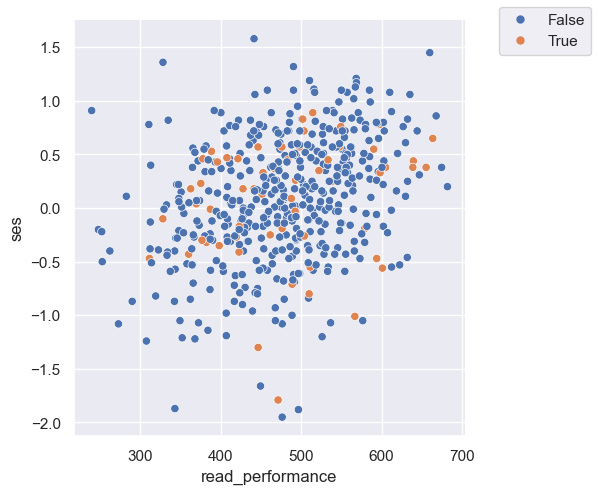

In [35]:
sns.set_theme()  # reset to defaults
ax = sns.relplot(data = sampled_df, x = "read_performance", y = 'ses', hue = "depression_bin")
sns.move_legend(ax, 'upper right', title=None, frameon=True)  # we need to pass the seaborn object that is returned by the plotting function

To adjust the ranges on the x- and y-axes, use `ax.set(ylim=(…,…), xlim=(…,…))` on an object `ax` returned from a Seaborn plot. Set any value to `None` if you don't want to specify the range limit. Oftentimes specifying ranges improves consistency between plots and allows for better interpretability of plots – it might especially be desired to have both axes start at 0.

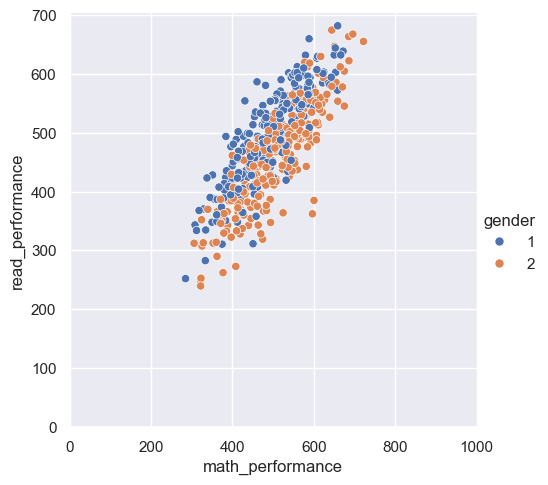

In [36]:
ax = sns.relplot(data = sampled_df, x = 'math_performance', y = 'read_performance', hue = 'gender')
ax.set(ylim=(0,None), xlim=(0,1000))

## Combined Plots

We can use `sns.pairplot` to visualize all pairwise relationships between a set of variables in our dataset. This is particularly helpful for exploratory data analysis early on.

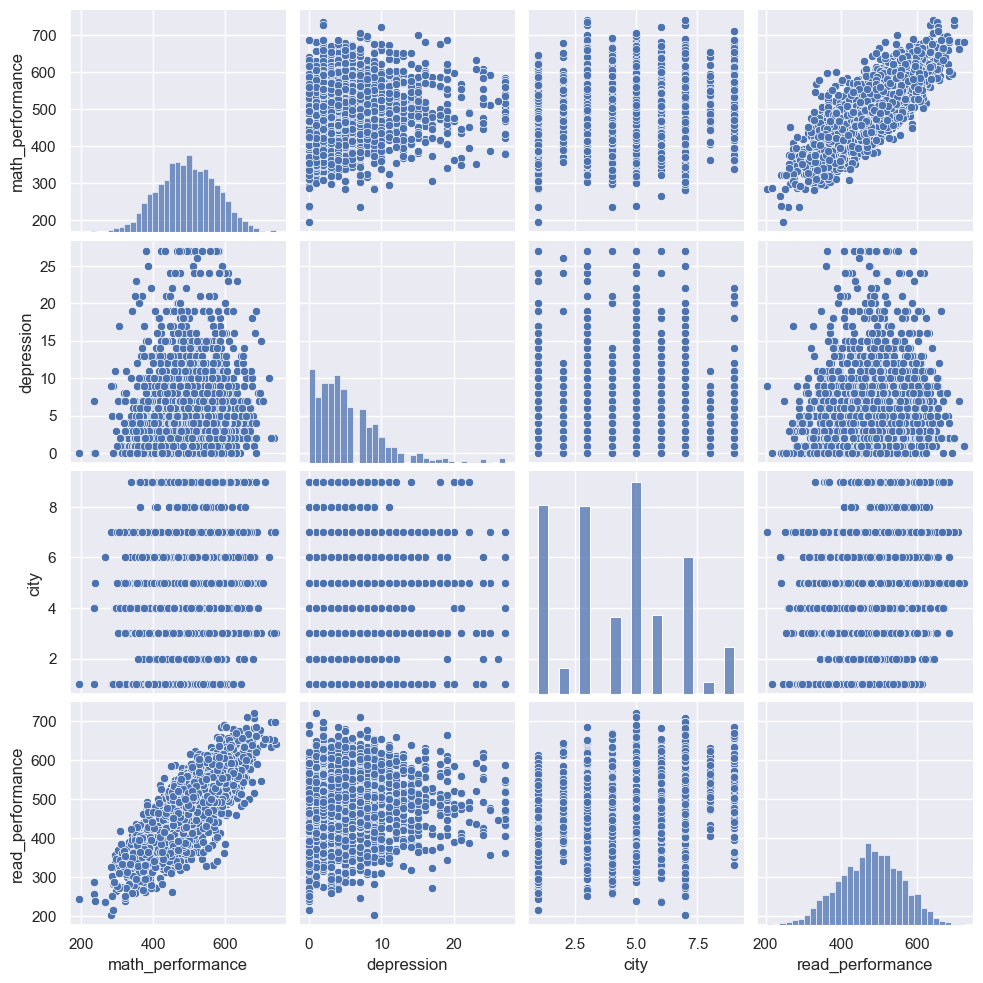

In [37]:
selected_columns = df[['math_performance', 'depression', 'city', 'read_performance']]

sns.pairplot(selected_columns) 

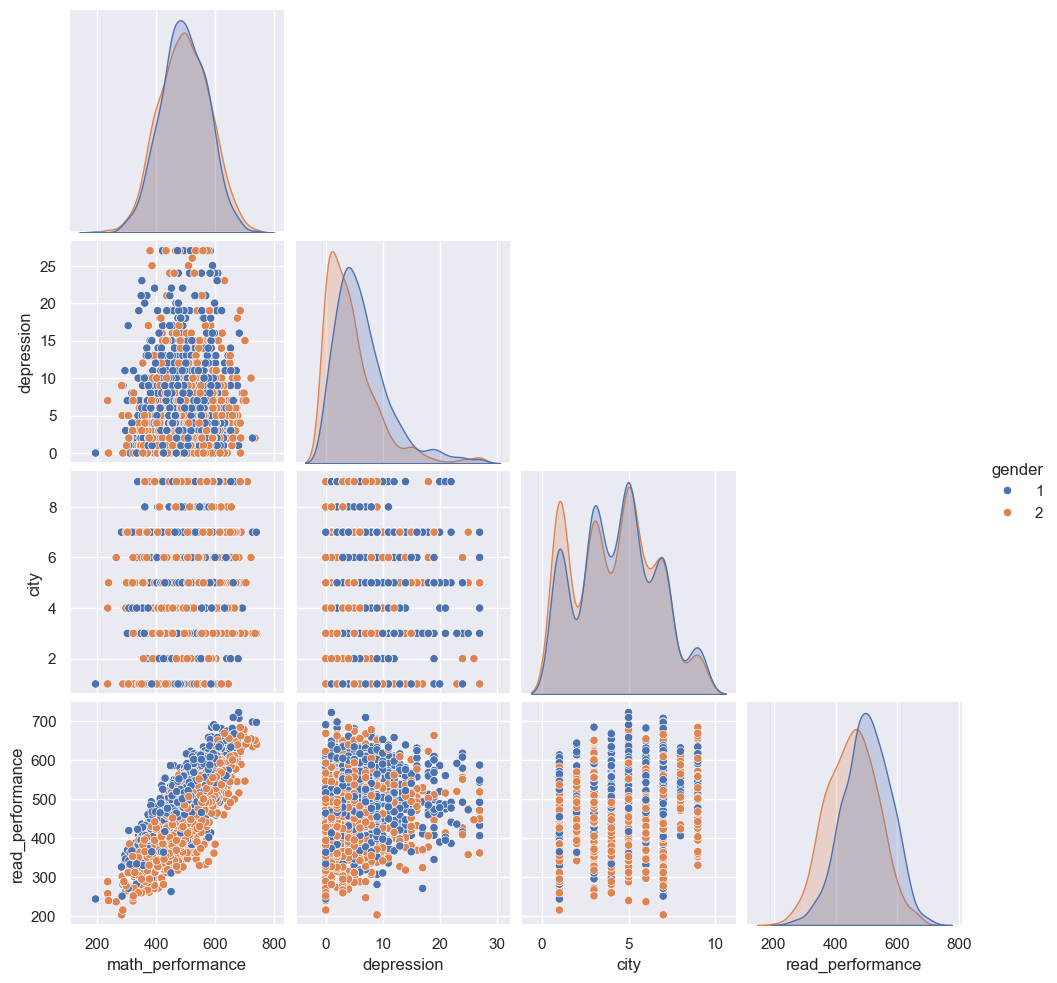

In [38]:
selected_columns = df[['math_performance', 'depression', 'city', 'read_performance', 'gender']]

sns.pairplot(selected_columns, hue = 'gender', corner = True)